In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
#loading data
orig_purchase = pd.read_csv('original_purchase_order.csv')
next_purchase = pd.read_csv('next_purchase_order.csv')
cust_features = pd.read_csv('customer_features.csv')
prod_features = pd.read_csv('product_features.csv')
last_month = pd.read_csv('last_month_assortment.csv')
next_month = pd.read_csv('next_month_assortment.csv')

In [17]:
cust_features.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',..."
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B..."
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps..."
3,1000423,26-35,True,"['Classic', 'Drama']"
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi..."


In [22]:
#one-hot encoding
cust_features = pd.read_csv('customer_features.csv')
cust_features['favorite_genres'] = cust_features.favorite_genres.apply(lambda x: x.replace("-", ""))
cust_features['favorite_genres'] = cust_features.favorite_genres.apply(lambda x: x.lower())
cust_features.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres
0,1000078,46-55,True,"['classic', 'history', 'selfhelp', 'romance', ..."
1,1000102,46-55,True,"['beachread', 'popsci', 'poppsychology', 'biog..."
2,1000185,46-55,True,"['romance', 'selfhelp', 'beachread', 'poppsych..."
3,1000423,26-35,True,"['classic', 'drama']"
4,1000696,66+,True,"['drama', 'thriller', 'scifi', 'romance', 'his..."


In [23]:
vect = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
X = vect.fit_transform(cust_features.favorite_genres)
cust_features = cust_features.join(pd.DataFrame(X.toarray(), columns=vect.get_feature_names()))
cust_features
cust_features.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres,beachread,biography,classic,drama,history,poppsychology,popsci,romance,scifi,selfhelp,thriller
0,1000078,46-55,True,"['classic', 'history', 'selfhelp', 'romance', ...",1,0,1,0,1,1,1,1,1,1,1
1,1000102,46-55,True,"['beachread', 'popsci', 'poppsychology', 'biog...",1,1,0,1,0,1,1,0,1,1,0
2,1000185,46-55,True,"['romance', 'selfhelp', 'beachread', 'poppsych...",1,0,0,0,0,1,0,1,0,1,0
3,1000423,26-35,True,"['classic', 'drama']",0,0,1,1,0,0,0,0,0,0,0
4,1000696,66+,True,"['drama', 'thriller', 'scifi', 'romance', 'his...",1,1,0,1,1,0,0,1,1,0,1


In [82]:
#cust_features['age_bucket'].fillna(values = cust_features['age_bucket'].median()).astype(str)

In [29]:
orig_purchase.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1769808,77,2.20,16.67
1,1896283,67,1.46,9.59
2,1889979,80,2.06,13.36
3,1341288,85,1.25,6.57
4,1666328,60,1.51,10.49


In [28]:
next_purchase.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1479507,39,1.82,12.68
1,1681385,55,1.73,12.88
2,1771749,37,1.26,10.38
3,1605149,49,1.47,11.27
4,1861356,34,1.98,10.41


In [36]:
#calculate loan
def calc_loan(df_qty, df_cost):
    df_total_cost = df_qty*df_cost
    return round(sum(df_total_cost),2)

In [228]:
#calculating last month's loan
last_month_loan = calc_loan(orig_purchase['quantity_purchased'], orig_purchase['cost_to_buy'])
print('Loan taken for last month\'s purchase: ', last_month_loan)

#calculating next month's cost
next_month_cost = calc_loan(next_purchase['quantity_purchased'], next_purchase['cost_to_buy'])
print('Loan taken for next month\'s purchase: ', next_month_cost)

Loan taken for last month's purchase:  135546.42
Loan taken for next month's purchase:  24155.51


In [40]:
last_month.head()

,customer_id,product_id,purchased
0,1000078,1730073,False
1,1000078,1470520,False
2,1000078,1861356,False
3,1000078,1240824,True
4,1000078,1155460,False


In [52]:
#Calculate shipping cost for last month's assortment:
last_month['shipping_cost'] = last_month.purchased.apply(lambda x: 0.6 if x==True else 1.2)
last_month.head()

,customer_id,product_id,purchased,shipping_cost
0,1000078,1730073,False,1.2
1,1000078,1470520,False,1.2
2,1000078,1861356,False,1.2
3,1000078,1240824,True,0.6
4,1000078,1155460,False,1.2


In [54]:
last_month_shipping_cost = round(sum(last_month['shipping_cost']),2)
print('Last month assortment\'s shipping cost: ', last_month_shipping_cost)

Last month assortment's shipping cost:  35592.6


In [56]:
df_last_month_sales = pd.merge(orig_purchase, last_month, on ='product_id')
df_last_month_sales.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,customer_id,purchased,shipping_cost
0,1769808,77,2.2,16.67,1024268,False,1.2
1,1769808,77,2.2,16.67,1029037,False,1.2
2,1769808,77,2.2,16.67,1040471,False,1.2
3,1769808,77,2.2,16.67,1049982,False,1.2
4,1769808,77,2.2,16.67,1064903,True,0.6


In [73]:
total_sales_last_month = round(sum(df_last_month_sales['retail_value'].where(df_last_month_sales['purchased']==True, 0)),2)

In [75]:
print(total_sales_last_month)

151617.36


In [158]:
# let's build models
#preprocessing data for models

data_last = pd.merge(df_last_month_sales, prod_features, on = 'product_id')
data_last = pd.merge(data_last, cust_features, on = 'customer_id')
data_last = data_last.drop(columns=['favorite_genres'])
data_last.columns


Index(['product_id', 'quantity_purchased', 'cost_to_buy', 'retail_value',
       'customer_id', 'purchased', 'shipping_cost', 'length', 'difficulty',
       'fiction', 'genre', 'age_bucket', 'is_returning_customer', 'beachread',
       'biography', 'classic', 'drama', 'history', 'poppsychology', 'popsci',
       'romance', 'scifi', 'selfhelp', 'thriller'],
      dtype='object')

In [163]:
#dealing with age-bucket!!!
#data_last['age_bucket'] = data_last['age_bucket'].replace('66+', '66')
#data_last['age_bucket'] = data_last['age_bucket'].fillna()
data_last['age_bucket'] = data_last['age_bucket'].astype(str)

In [164]:
#label-encoding columns with string or categorical data into int

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_last['purchased'] = le.fit_transform(data_last['purchased'])
data_last['fiction'] = le.fit_transform(data_last['fiction'])
data_last['genre'] = le.fit_transform(data_last['genre'])
data_last['age_bucket'] = le.fit_transform(data_last['age_bucket'])
#data_last['is_returning_customer'] = le.fit_transform(data_last['is_returning_customer'])

In [165]:
data_last.head()
#data_last.columns

,product_id,quantity_purchased,cost_to_buy,retail_value,customer_id,purchased,shipping_cost,length,difficulty,fiction,...,biography,classic,drama,history,poppsychology,popsci,romance,scifi,selfhelp,thriller
0,1769808,77,2.20,16.67,1024268,0,1.2,148,3,0,...,0,1,0,0,0,0,0,0,0,1
1,1541404,64,2.01,11.63,1024268,0,1.2,431,1,1,...,0,1,0,0,0,0,0,0,0,1
2,1049883,64,1.31,9.80,1024268,0,1.2,264,5,1,...,0,1,0,0,0,0,0,0,0,1
3,1557093,96,2.18,11.38,1024268,0,1.2,896,-1,1,...,0,1,0,0,0,0,0,0,0,1
4,1124997,99,1.66,8.44,1024268,0,1.2,956,1,0,...,0,1,0,0,0,0,0,0,0,1


In [92]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

/home/muthudivya/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [148]:
estimator = LogisticRegression()
selector = RFE(estimator)
selector = selector.fit(data_last[features], data_last[target_label])

/home/muthudivya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
print(selector.support_)
print(selector.ranking_)

[ True  True False  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False]
[ 1  1  2  1  1  1  1  1  1  1  1  1 10 12  6  7  5  3  8 11  9  4 13]


,product_id,quantity_purchased,cost_to_buy,retail_value,customer_id,purchased,shipping_cost,length,difficulty,fiction,...,biography,classic,drama,history,poppsychology,popsci,romance,scifi,selfhelp,thriller
product_id,1.000000,0.066963,-0.016564,0.008860,0.004887,0.003568,-0.003568,0.008569,0.013195,-0.009178,...,-0.000085,0.009941,-0.001097,0.005875,0.000737,0.001469,0.001229,-0.006691,-0.000353,0.006331
quantity_purchased,0.066963,1.000000,0.027138,0.012839,0.003019,-0.009438,0.009438,0.030237,-0.077858,0.045236,...,-0.002959,0.005305,0.009807,0.000086,0.003162,0.002851,-0.000221,-0.001043,0.001128,-0.000790
cost_to_buy,-0.016564,0.027138,1.000000,0.812889,-0.006323,-0.014180,0.014180,0.029255,0.075505,-0.027711,...,-0.000763,-0.001668,-0.005494,-0.004762,0.005356,-0.003143,-0.009380,0.001100,-0.000889,-0.002157
retail_value,0.008860,0.012839,0.812889,1.000000,-0.003649,-0.021642,0.021642,0.025461,0.052016,-0.033060,...,-0.003794,0.003787,-0.004838,-0.007029,0.002306,0.000048,-0.012599,-0.004741,0.001644,-0.001467
customer_id,0.004887,0.003019,-0.006323,-0.003649,1.000000,-0.003861,0.003861,-0.003341,0.000279,0.004758,...,-0.000722,0.011362,0.011069,0.018728,0.007010,-0.002619,0.010923,0.009659,0.013354,0.011732
purchased,0.003568,-0.009438,-0.014180,-0.021642,-0.003861,1.000000,-1.000000,0.005395,-0.044278,0.120621,...,0.016741,0.028101,0.028298,0.030579,0.031766,0.027471,0.018877,0.025804,0.031469,0.015875
shipping_cost,-0.003568,0.009438,0.014180,0.021642,0.003861,-1.000000,1.000000,-0.005395,0.044278,-0.120621,...,-0.016741,-0.028101,-0.028298,-0.030579,-0.031766,-0.027471,-0.018877,-0.025804,-0.031469,-0.015875
length,0.008569,0.030237,0.029255,0.025461,-0.003341,0.005395,-0.005395,1.000000,-0.045527,-0.016003,...,-0.005749,0.003482,-0.003418,-0.002911,-0.002998,-0.006329,-0.007455,-0.000038,-0.000013,-0.004645
difficulty,0.013195,-0.077858,0.075505,0.052016,0.000279,-0.044278,0.044278,-0.045527,1.000000,-0.014113,...,0.007770,0.001692,0.004794,0.010678,0.006498,0.005561,0.006046,0.000638,0.006370,0.008386
fiction,-0.009178,0.045236,-0.027711,-0.033060,0.004758,0.120621,-0.120621,-0.016003,-0.014113,1.000000,...,-0.000972,-0.000367,-0.009638,-0.005342,-0.008963,-0.008816,-0.001068,-0.005777,0.000467,0.007718


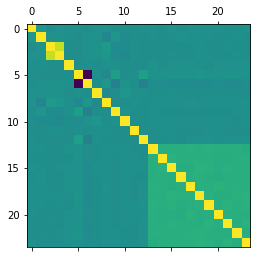

In [153]:
#feature selection

import matplotlib.pyplot as plt

plt.matshow(data_last.corr())
data_last.corr()

In [166]:
target_labels = ['purchased']
predictors = ['retail_value', 'length', 'difficulty','fiction', 'genre', 'age_bucket', 
            'is_returning_customer', 'beachread', 'biography', 'classic', 'drama', 'history', 
            'poppsychology', 'popsci', 'romance', 'scifi', 'selfhelp', 'thriller']
y = data_last[target_label]
X = data_last[predictors]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/muthudivya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6448611111111111


In [169]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

/home/muthudivya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [181]:
y_pred = abc.predict(X_test)
print('Accuracy of adaboost classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of adaboost classifier on test set: 0.75


In [182]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/home/muthudivya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [183]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of random forest classifier on test set: 0.72


In [186]:
#moving with AdaBoost
print(X_train.columns)
abc.feature_importances_

Index(['retail_value', 'length', 'difficulty', 'fiction', 'genre',
       'age_bucket', 'is_returning_customer', 'beachread', 'biography',
       'classic', 'drama', 'history', 'poppsychology', 'popsci', 'romance',
       'scifi', 'selfhelp', 'thriller'],
      dtype='object')


array([0.06, 0.62, 0.1 , 0.02, 0.  , 0.04, 0.04, 0.  , 0.  , 0.02, 0.02,
       0.04, 0.  , 0.02, 0.  , 0.  , 0.02, 0.  ])

In [232]:
orig_purchase.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1769808,77,2.20,16.67
1,1896283,67,1.46,9.59
2,1889979,80,2.06,13.36
3,1341288,85,1.25,6.57
4,1666328,60,1.51,10.49


In [253]:
#calculate left-over from last_month
df_temp = last_month.groupby(['product_id'])['purchased'].sum().reset_index()
df_temp.head()
df_temp = pd.DataFrame(data = df_temp)

In [259]:
orig_leftover = pd.merge(orig_purchase, df_temp, on = 'product_id')
orig_leftover['qty_left']=orig_leftover['quantity_purchased'] - orig_leftover['purchased']
orig_leftover = orig_leftover.drop(columns =['quantity_purchased', 'purchased'])
orig_leftover.head()

,product_id,cost_to_buy,retail_value,qty_left
0,1769808,2.20,16.67,69.0
1,1896283,1.46,9.59,65.0
2,1889979,2.06,13.36,74.0
3,1341288,1.25,6.57,56.0
4,1666328,1.51,10.49,40.0


In [188]:
#Let's make predictions for next month's assortment:
next_purchase.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1479507,39,1.82,12.68
1,1681385,55,1.73,12.88
2,1771749,37,1.26,10.38
3,1605149,49,1.47,11.27
4,1861356,34,1.98,10.41


In [189]:
next_month.head()

,customer_id,product_id
0,1600785,1443029
1,1600785,1164138
2,1600785,1636511
3,1600785,1832547
4,1600785,1237420


In [260]:
data_next = pd.merge(next_month, orig_leftover, on = 'product_id')
data_next = pd.merge(data_next, cust_features, on = 'customer_id')
data_next = pd.merge(data_next, prod_features, on = 'product_id')

In [261]:
data_next.head()

,customer_id,product_id,cost_to_buy,retail_value,qty_left,age_bucket,is_returning_customer,favorite_genres,beachread,biography,...,poppsychology,popsci,romance,scifi,selfhelp,thriller,length,difficulty,fiction,genre
0,1600785,1443029,2.27,12.88,60.0,56-65,False,"['romance', 'biography', 'classic', 'poppsycho...",0,1,...,1,1,1,1,1,1,266,1,True,Sci-Fi
1,1601264,1443029,2.27,12.88,60.0,56-65,True,"['thriller', 'romance', 'selfhelp', 'history',...",1,1,...,0,0,1,0,1,1,266,1,True,Sci-Fi
2,1604824,1443029,2.27,12.88,60.0,46-55,True,[],0,0,...,0,0,0,0,0,0,266,1,True,Sci-Fi
3,1659117,1443029,2.27,12.88,60.0,36-45,False,[],0,0,...,0,0,0,0,0,0,266,1,True,Sci-Fi
4,1680221,1443029,2.27,12.88,60.0,46-55,True,"['popsci', 'biography', 'poppsychology', 'beac...",1,1,...,1,1,0,0,0,0,266,1,True,Sci-Fi


In [262]:
data_next['age_bucket'] = data_next['age_bucket'].astype(str)
data_next['fiction'] = le.fit_transform(data_next['fiction'])
data_next['genre'] = le.fit_transform(data_next['genre'])
data_next['age_bucket'] = le.fit_transform(data_next['age_bucket'])
data_next['is_returning_customer'] = le.fit_transform(data_next['is_returning_customer'])

In [263]:
data_next.columns

Index(['customer_id', 'product_id', 'cost_to_buy', 'retail_value', 'qty_left',
       'age_bucket', 'is_returning_customer', 'favorite_genres', 'beachread',
       'biography', 'classic', 'drama', 'history', 'poppsychology', 'popsci',
       'romance', 'scifi', 'selfhelp', 'thriller', 'length', 'difficulty',
       'fiction', 'genre'],
      dtype='object')

In [264]:
features_for_prediction = ['retail_value', 'length', 'difficulty', 'fiction', 'genre',
       'age_bucket', 'is_returning_customer', 'beachread', 'biography',
       'classic', 'drama', 'history', 'poppsychology', 'popsci', 'romance',
       'scifi', 'selfhelp', 'thriller']
X = data_next[features_for_prediction]

In [265]:
X.head()

,retail_value,length,difficulty,fiction,genre,age_bucket,is_returning_customer,beachread,biography,classic,drama,history,poppsychology,popsci,romance,scifi,selfhelp,thriller
0,12.88,266,1,1,8,5,0,0,1,1,0,1,1,1,1,1,1,1
1,12.88,266,1,1,8,5,1,1,1,0,0,1,0,0,1,0,1,1
2,12.88,266,1,1,8,4,1,0,0,0,0,0,0,0,0,0,0,0
3,12.88,266,1,1,8,3,0,0,0,0,0,0,0,0,0,0,0,0
4,12.88,266,1,1,8,4,1,1,1,1,0,0,1,1,0,0,0,0


In [266]:
print(X.shape)
print(len(data_next['product_id'].unique()))

(56400, 18)
1000


In [267]:
pred_purchase = abc.predict(X)
print('no of books predicted to be purchased: ',sum(pred_purchase))
sum(pred_purchase)/X.shape[0]

no of books predicted to be purchased:  15734


0.27897163120567375

In [268]:
#lets calculate shipping cost for next_month's prediction
next_month_shipping = (sum(pred_purchase)*0.6 + (X.shape[0]-sum(pred_purchase)*1.2))
print('Shipping cost predictions for next month\'s assortment: ', next_month_shipping)

Shipping cost predictions for next month's assortment:  46959.6


In [269]:
#calculate sales for next month:
data_next['pred_purchase'] = pred_purchase
#data_next.head()
next_sales = round(sum(data_next['retail_value'].where(data_next['pred_purchase']==1, 0)),2)
print("Sale prediction for next month: ", next_sales)

Sale prediction for next month:  187606.2


In [272]:
#coming to the actual question now! if we'll be able to pay back loan and afford next book purchase?
total_cost_to_us = last_month_loan + next_month_cost + last_month_shipping_cost + next_month_shipping
total_sales = total_sales_last_month + next_sales
print("Did we make it? How much: ", total_sales - total_cost_to_us)

Did we make it? How much:  96969.42999999996
